# Slicing images with nipy

Sometimes it is useful to slice out image edges or subsample images.   For example, your functional images might have a lot of empty space around the brain that will take up memory during processing, or your structural image might contain too much of the subject's neck, or the resolution may be to high.

You can always load the image data and slice away the parts of the image data array that you don't want, but then you will have to work out the effect this should have on the image affine (see http://nipy.org/nibabel/coordinate_systems.html).

Luckily nipy has the ability to slice images while working out the effect on the affine matrix for you.

In [1]:
# Import the numerical and plotting libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Show plots inside the notebook
%matplotlib inline

In [3]:
# - set gray colormap and nearest neighbor interpolation by default
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

In [4]:
# - make numpy print numbers to 4dp only
np.set_printoptions(precision=4, suppress=True)

We load our example functional image again:

In [5]:
import nipy

In [6]:
img = nipy.load_image('ds114_sub009_t2r1.nii')
img.coordmap

AffineTransform(
   function_domain=CoordinateSystem(coord_names=('i', 'j', 'k', 't'), name='voxels', coord_dtype=float64),
   function_range=CoordinateSystem(coord_names=('scanner-x=L->R', 'scanner-y=P->A', 'scanner-z=I->S', 't'), name='scanner', coord_dtype=float64),
   affine=array([[  -4.    ,    0.    ,    0.    ,    0.    ,  124.244 ],
                 [   0.    ,    3.9345,    0.7207,    0.    , -103.4497],
                 [   0.    ,   -0.7207,    3.9346,    0.    ,  -33.4929],
                 [   0.    ,    0.    ,    0.    ,    2.5   ,    0.    ],
                 [   0.    ,    0.    ,    0.    ,    0.    ,    1.    ]])
)

The functional data has a lot of empty space around the brain:

In [7]:
data = img.get_data()
data.shape

(64, 64, 30, 173)

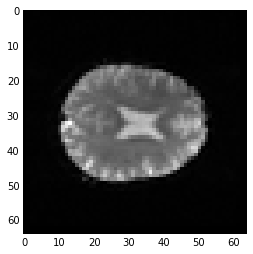

In [8]:
plt.imshow(data[:, :, 15, 0])

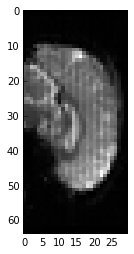

In [9]:
plt.imshow(data[32, :, :, 0])  # A sagittal slice

Maybe we would look to slice off the empty space to left and right and front and back of the brain.

Maybe we also want to halve the resolution in the bottom-top direction.  We do that by slicing the image:

In [10]:
small_img = img[15:50, 8:55, ::2]

The slicing we did on the image shows up when we get the data from the image:

In [11]:
small_data = small_img.get_data()
small_data.shape

(35, 47, 15, 173)

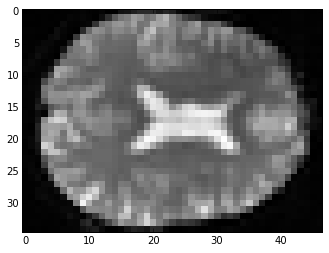

In [12]:
plt.imshow(small_data[:, :, 7, 0])

The sagittal view now looks more squashed up because we've removed every second slice with the image slicing:

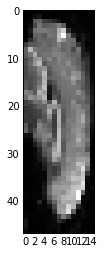

In [13]:
plt.imshow(small_data[17, :, :, 0])

Nipy adjusted the image affine to the slicing.  Notice that the last column of the affine, reflecting the different translations to go from voxel 0, 0, 0 to the position in millimeters (voxel 0, 0, 0 is a different voxel after the slicing).  Also, the second to last column contains the size of the voxel in the z (bottom to top) direction, and this is now around 8 instead of 4 previously.  That is because we threw away every second slice, so the remaining slices are twice the distance apart from each other.

In [14]:
small_img.affine

array([[ -4.    ,   0.    ,   0.    ,   0.    ,  64.244 ],
       [  0.    ,   3.9345,   1.4414,   0.    , -71.9734],
       [  0.    ,  -0.7207,   7.8691,   0.    , -39.2586],
       [  0.    ,   0.    ,   0.    ,   2.5   ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ,   1.    ]])

In the notebook on diagnostics, we saw that the first few scans were different from the rest.  This is the T1 effect, where the signal is largest when the radiofrequency stimulation first starts.   We can drop the first four scans with slicing, to get rid of this effect.

In [15]:
img = img[..., 4:]

In [16]:
img.shape

(64, 64, 30, 169)

We can save this image back out to disk for further processing by other packages:

In [17]:
nipy.save_image(img, 'fixed.nii')

/Users/mb312/Library/Python/2.7/lib/python/site-packages/nipy/io/files.py:145: FutureWarning: Default `strict` currently False; this will change to True in a future version of nipy
  ni_img = nipy2nifti(img, data_dtype = io_dtype)


Image(
  data=memmap([[[[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]],
       
               [[ 8, 10, ..., 10,  7],
                [11, 10, ...,  8, 10],
                ..., 
                [19, 11, ..., 20, 21],
                [28, 23, ..., 19, 35]],
       
               ..., 
               [[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]],
       
               [[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]]],
       
       
              [[[ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0],
                ..., 
                [ 0,  0, ...,  0,  0],
                [ 0,  0, ...,  0,  0]],
       
               [[10, 10, ..